# Methodology
1. Input three integers $p,q,r$. These define the polynomial:
$\lambda^n -p\lambda^{n-1} + q\lambda + r = 0$
2. Find the complex Perron number for the given polynomial.
3. Using this root, construct the free group (and the resulting parallelograms) given by: 
$F(a_1,a_2, \cdots, a_n)$ where $a_1=1, a_2=\lambda, \cdots, a_n = \lambda^{n-1}$.
4. Solve the endomorphism $\phi (F(a))$:

$\phi(a_i) = 
\begin{cases}
\phi(a_i) = a_{i+1},\quad \text{for } 1 \leq i \leq n - 1\\
\phi(a_i) = a_n^p a_1^{-r} a_2^{-q},\quad \text{for } i = n
\end{cases}$
5. Use repeatedly applying this endomorphism to a parallelogram in the free group (such as $[a_1,a_2]$), we can approximate the translation-self-similar tiles (and graph them).

## Notes
* Every function that ask for $n$ defaults to an input of $n=3$.
* With a few minor modifications, this project can be generalized to work properly with larger $n$.

In [1]:
import numpy as np
from itertools import combinations

## Solving for the Complex Perron Number, $\lambda$:
* The find_lambda() function solves for the input polynomial's complex Perron number.
* It does so by making use of SageMath's built in solve() function to find the roots. Then it compares their complex modulus (using a short function I wrote) and returns the one with the greatest value.

In [2]:
def complex_modulus(numb):
    return sqrt( imag(numb)**2+real(numb)**2 )

def find_lambda(p,q,r,n=3):
    #Not currently interested in testing n > 3
    assert (min(p,q,r-1) >= 0 ) ,"Invalid Inputs"
    f(l) = l**n - p*l**(n-1) + q*l + r
    max_modulus = 0
    for root in solve(f,l,solution_dict=True):
        if complex_modulus(root[l]) > max_modulus:
            max_modulus = complex_modulus(root[l])
            complex_perron = root[l]
    return f(l), complex_perron

## Defining the Elementary Vectors
* Formally, the three free group is $F(1,\lambda,\lambda^2)$.
* The function below "create_vectors()" also defines the inverse of these elements. We do so because it is an efficient way to keep track of the orientation of each vector.

In [3]:
def create_vectors(l):
    freeGroup = [1,l,l*l,-1,-l,-l*l]
    vector_list = []
    [ vector_list.append( np.array([real(vector),imag(vector)]) ) for vector in freeGroup ]
    return vector_list

## Applying the Endomorphism, $\phi$, to a Tile
* The program keeps track of tiles via a string. Each digit represents the next elementary vector that is drawn to complete the shape. Each digit is mapped to the element in that position in vector_list.
    - For example the string "0134" is the parallelogram $[a_1,a_2]$.
* The for loop applies $\phi$ to each element then appends the result to the end of a new string for the new tile the function is generating.

In [4]:
def evolve(shape,p,q,r,n=3):
    out = ""
    string_n = str(n-1)*p + '3'*r + '4'*q
    string_inv_n = '1'*q + '0'*r + str(2*n-1)*p
    for item in shape:
        if int(item) in [0,1,3,4]:
          item = str( int(item)+1 )
        elif int(item) == n-1:
          item = string_n
        elif int(item) == 2*n-1:
          item= string_inv_n
        out = ''.join((out,item))
    if len(out) <= 100:
        print(out)
    return out

## Plotting Tiles
*This function first converts the string into a list of points, (x,y), which are the consecutive points making up the tile.
* It then makes use of SageMath's built in polygon() function to plot it.

In [5]:
def plot_shape(shape_str,vectors):
    #input is string and vectors
    shape_list = []
    pt = (0,0)
    for vector in shape_str:
        pt = pt + vectors[int(vector)]
        shape_list.append(pt)
    return polygon(shape_list,aspect_ratio = 1,fill = False)
    #output is plot

## Example Output
* The code blocks below replicate the example from the paper [The Construction of Self-Similar Tilings](https://arxiv.org/pdf/math/9505210.pdf) in section 6 (starting on the bottom of page 15).

1245


Matplotlib is building the font cache; this may take a moment.


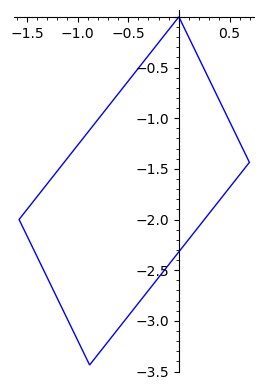

In [6]:
p,q,r = 1,2,1
n=3
_, l = find_lambda(p,q,r)
vectors = create_vectors(l)

init_shape ="0134"
output_str = evolve(init_shape,p,q,r)

plot_shape(output_str,vectors)

2234451105


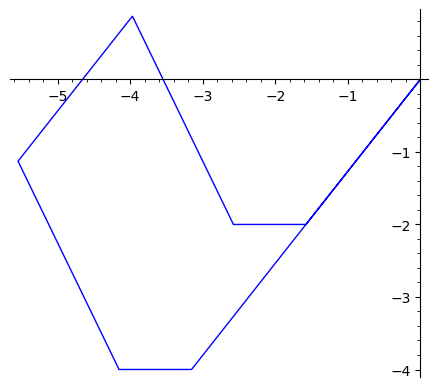

In [7]:
init_shape =output_str
output_str = evolve(init_shape,p,q,r)

plot_shape(output_str,vectors)

2344234445511052211105


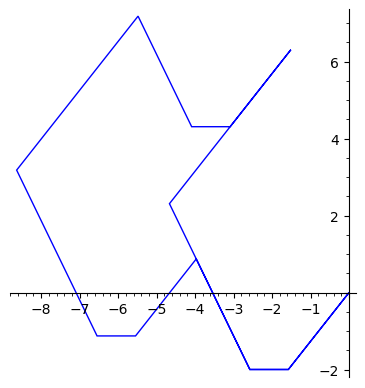

In [8]:
init_shape =output_str
output_str = evolve(init_shape,p,q,r)

plot_shape(output_str,vectors)

2344455234445551105110522111052344234422211105


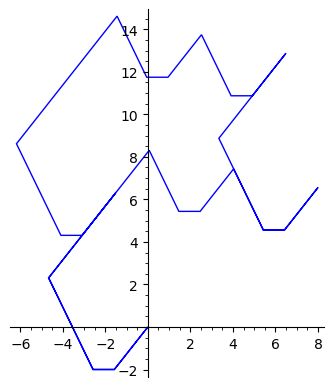

In [9]:
init_shape =output_str
output_str = evolve(init_shape,p,q,r)

plot_shape(output_str,vectors)

2344455511051105234445551105110511052211105221110523442344222111052344455234445523442344234422211105


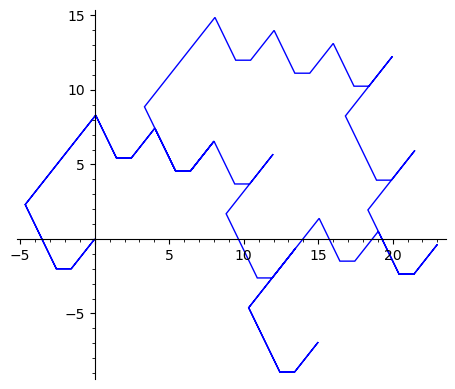

In [10]:
init_shape =output_str
output_str = evolve(init_shape,p,q,r)

plot_shape(output_str,vectors)

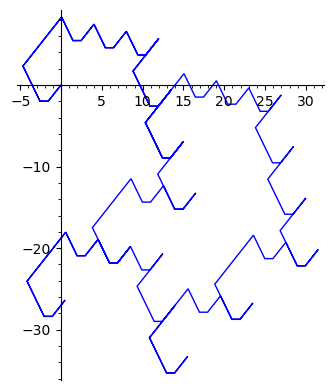

In [11]:
init_shape =output_str
output_str = evolve(init_shape,p,q,r)

plot_shape(output_str,vectors)

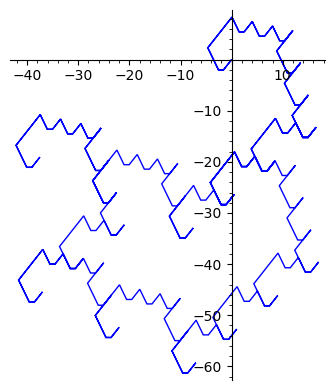

In [12]:
init_shape =output_str
output_str = evolve(init_shape,p,q,r)

plot_shape(output_str,vectors)

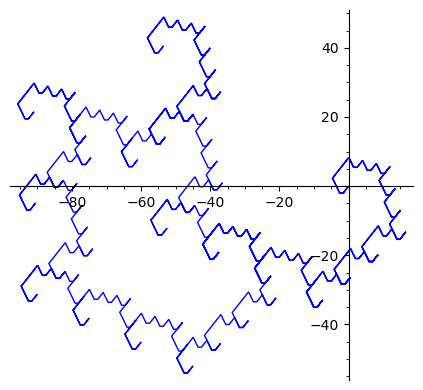

In [13]:
init_shape =output_str
output_str = evolve(init_shape,p,q,r)

plot_shape(output_str,vectors)

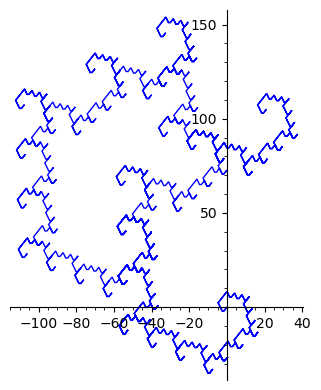

In [14]:
init_shape =output_str
output_str = evolve(init_shape,p,q,r)

plot_shape(output_str,vectors)

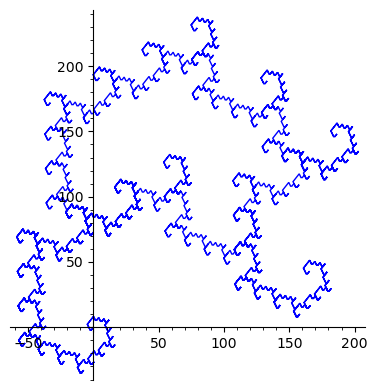

In [15]:
init_shape =output_str
output_str = evolve(init_shape,p,q,r)

plot_shape(output_str,vectors)

In [ ]:
init_shape =output_str
output_str = evolve(init_shape,p,q,r)
plot_shape(output_str,vectors)

In [ ]:
#Of course we do need need to print every step if we want to save time.
init_shape = "0134"
p,q,r = 1,2,1
n=3
shape_list = [init_shape]
new_shape = init_shape
print("Starting Tile:")
print(new_shape)
print('*'*20)
for idx in range(0,5):
    print("Step Number: " + str(idx) )
    new_shape = evolve(new_shape,p,q,r)
    shape_list.append(new_shape)
    print('*'*20)

plot_shape(new_shape,vectors)